In [1]:
import sys
sys.path.append("../../")

from lib.utils import load
from lib.dicom import read_dcm
from lib.plot import plot_grid, plot_volume
from lib.ct.segmentation import segment
from lib.cv import project

ct_paths = load("../output/ct_paths.pkl")
ct_paths.head(3)

,Subject,lung
0,0001,(/data/lidc/manifest-1600709154662/LIDC-IDRI/L...
1,0003,(/data/lidc/manifest-1600709154662/LIDC-IDRI/L...
2,0004,(/data/lidc/manifest-1600709154662/LIDC-IDRI/L...


In [7]:
for s, l in ct_paths.values:
    if len(l) < 100:
        print(s, len(l))

0078 87
0171 95
0323 96
0595 99
0611 92
0719 94
0886 95
0937 99
0957 65
0972 99
0983 90


In [10]:
"""
Read input CTs
"""

lung_paths = ct_paths.iloc[0]["lung"]
lung_sitk, lung_np = read_dcm(lung_paths, clip=True)

ImageSeriesReader (0x55cc1a961a60): Non uniform sampling or missing slices detected,  maximum nonuniformity:291.747



In [11]:
"""
Segmentation step
"""

lung_mask, body_mask, bones_mask = segment(lung_sitk, lung_np, bone_threshold=70)
plot_volume(lung_np, lung_mask, axis=0)

IndexError: index 0 is out of bounds for axis 0 with size 0

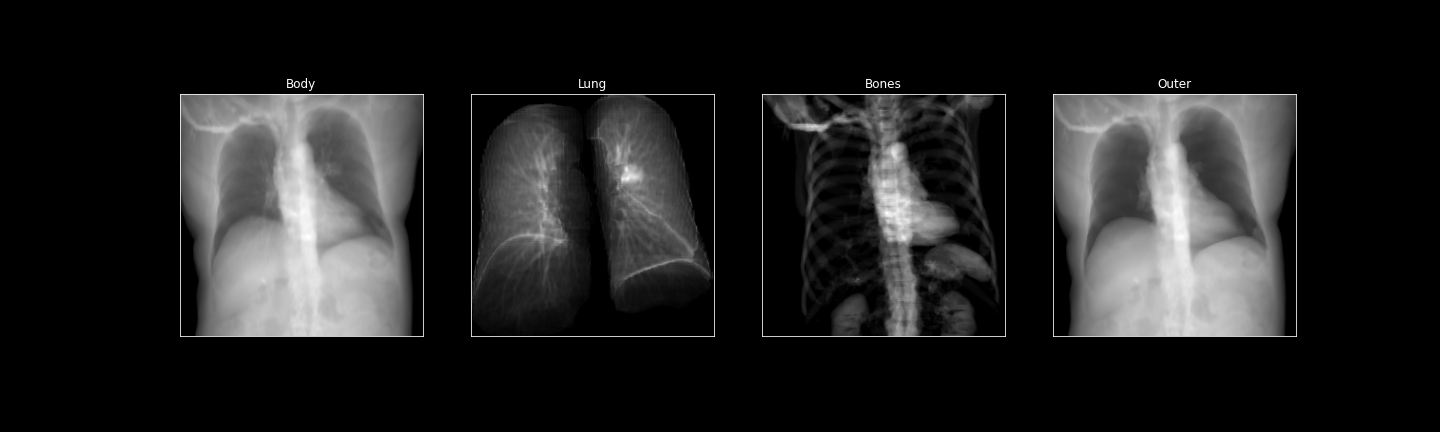

In [5]:
"""
Get Projections
"""

body = project(lung_np * body_mask, crop_size=256)
lung = project(lung_np * lung_mask, crop_size=256)
bones = project(lung_np * bones_mask, crop_size=256)
chest = project(lung_np * body_mask * (~lung_mask), crop_size=256)
plot_grid([body, lung, bones, chest], ("Body", "Lung", "Bones", "Outer"))